In [1]:
import pandas as pd 
import numpy as np 
import os
import cv2
import matplotlib.pyplot as plt
import warnings

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow import keras
import tensorflow 


import scipy
print("Num GPUs Available: ", len(tensorflow.config.list_physical_devices('GPU')))


# Set the seed value for experiment reproduci.bility.
seed = 1842
tensorflow.random.set_seed(seed)
np.random.seed(seed)
# Turn off warnings for cleaner looking notebook
warnings.simplefilter('ignore')

Num GPUs Available:  0


In [2]:

WIDTH,HEIGHT=176,208
image_generator = ImageDataGenerator(rescale=1/255,validation_split=0,shear_range =.25, horizontal_flip = True, rotation_range=20)     


train_dataset = image_generator.flow_from_directory(batch_size=8,
                                                 directory='/Users/prasonagnihottri/Downloads/Alzheimer_s Dataset/train',
                                                 shuffle=True,
                                                 target_size=(WIDTH,HEIGHT), 
                                                 subset="training",
                                                 class_mode='categorical')


image_generator_submission = ImageDataGenerator(rescale=1/255,validation_split=0.2) 
validation_dataset = image_generator_submission.flow_from_directory(batch_size=8,
                                                 directory='/Users/prasonagnihottri/Downloads/Alzheimer_s Dataset/test',
                                                 shuffle=True,
                                                 target_size=(WIDTH,HEIGHT), 
                                                 class_mode='categorical')


submission = image_generator_submission.flow_from_directory(
                                                 directory='/Users/prasonagnihottri/Downloads/Alzheimer_s Dataset/test',
                                                 shuffle=False,
                                                 target_size=(WIDTH,HEIGHT), 
                                                 subset="validation",
                                                 class_mode=None)

Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.
Found 254 images belonging to 4 classes.


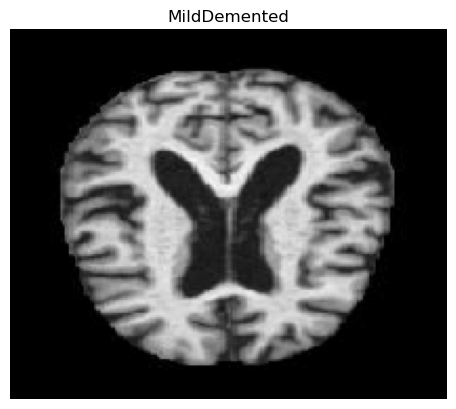

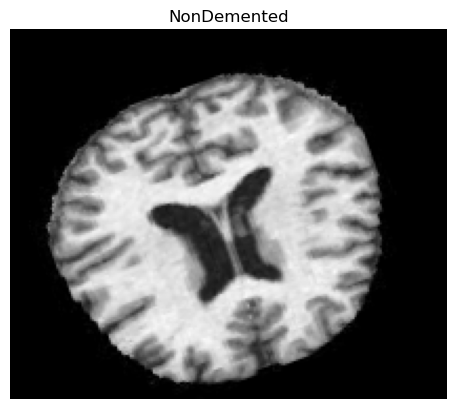

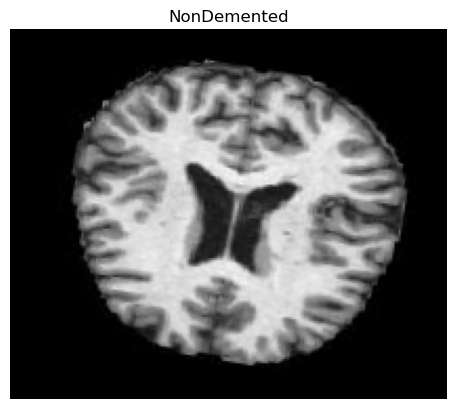

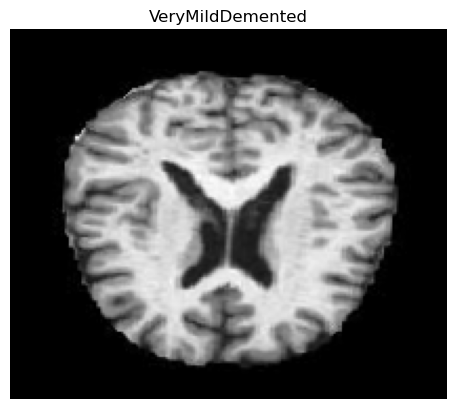

In [4]:
class_indices = train_dataset.class_indices
class_names = list(class_indices.keys())

# Ensure batch_1_img is defined by fetching the first batch from train_dataset
batch_1_img = train_dataset[0]

for i in range(0, 4):
    img = batch_1_img[0][i]  # Accessing images
    lab = batch_1_img[1][i]  # Accessing labels
    class_label = class_names[np.argmax(lab)]  # Getting the class label name
    plt.imshow(img)
    plt.title(class_label)
    plt.axis('off')
    plt.show()



In [ ]:
model = keras.models.Sequential([keras.layers.Flatten(input_shape = [WIDTH,HEIGHT,3]),    #ANN Model                   
                            

keras.layers.Dense(300, activation = 'relu' ),

keras.layers.Dense(400, activation = 'relu' ),

keras.layers.Dense(400, activation = 'relu' ),

keras.layers.Dense(400, activation = 'relu' ),
keras.layers.Dense(4, activation = 'softmax')])

model.compile(optimizer='adam',
loss=tensorflow.losses.CategoricalCrossentropy(),
metrics=['acc'])
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=3,
                                            restore_best_weights=True)
model.fit(train_dataset, epochs=50, validation_data=validation_dataset, callbacks=callback)

Epoch 1/50
209/641 ━━━━━━━━━━━━━━━━━━━━ 46s 107ms/step - acc: 0.4207 - loss: 4.2794

In [ ]:
loss, accuracy = model.evaluate(validation_dataset)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

In [ ]:
#simple ann with 3 layers 
model = keras.models.Sequential([keras.layers.Flatten(input_shape = [WIDTH,HEIGHT,3]),                             
keras.layers.Dense(300, activation = 'relu' ),
keras.layers.Dropout(0.2),
keras.layers.Dense(400, activation = 'relu' ),
keras.layers.Dropout(0.2),
keras.layers.Dense(400, activation = 'relu' ),
keras.layers.Dropout(0.2),
keras.layers.Dense(400, activation = 'relu' ),
keras.layers.Dense(4, activation = 'softmax')])


model.compile(optimizer='adam',
loss=tensorflow.losses.CategoricalCrossentropy(),
metrics=['acc'])

callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=4,
                                            restore_best_weights=True)

In [ ]:
model.fit(train_dataset, epochs=50, validation_data=validation_dataset, callbacks=callback)

In [ ]:
loss, accuracy = model.evaluate(validation_dataset)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

In [6]:
#vgg 19
vgg = VGG19(input_shape=(WIDTH,HEIGHT,3), weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False
x = Flatten()(vgg.output)

prediction = Dense(4, activation='softmax')(x)

modelvgg = Model(inputs=vgg.input, outputs=prediction)
modelvgg.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 176, 208, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 176, 208, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 176, 208, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 88, 104, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 88, 104, 128)   │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 88, 104, 128)   │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 44, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 44, 52, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 44, 52, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 44, 52, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 44, 52, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 22, 26, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 22, 26, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 22, 26, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 22, 26, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 22, 26, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 11, 13, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 11, 13, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 11, 13, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 11, 13, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 11, 13, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 5, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 15360)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │        61,444 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,085,828 (76.62 MB)

 Trainable params: 61,444 (240.02 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [7]:
modelvgg.compile(optimizer='adam',
loss=tensorflow.losses.CategoricalCrossentropy(),
metrics=['acc'])
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=8,
                                            restore_best_weights=True)

In [ ]:
modelvgg.fit(train_dataset, epochs=50, validation_data=validation_dataset, callbacks=callback)

Epoch 1/50
120/641 ━━━━━━━━━━━━━━━━━━━━ 7:20 845ms/step - acc: 0.4639 - loss: 1.4130

In [ ]:
loss, accuracy = modelvgg.evaluate(validation_dataset)
print("Loss: ", loss)
print("Accuracy: ", accuracy)